# Scikit demo
## Rozróżnianie ubrań i obuwia na podstawie zdjęć

Importujemy matplot'a, scikit'a, numpaja oraz dataset Fashion MNIST z kerasa

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import numpy as np
import random
from keras.datasets import fashion_mnist

Using TensorFlow backend.


## Słownik klas
Tłumaczenie liczby opisującej klasę na ludzką nazwę 🤖

In [2]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

## Dane wejściowe
Wczytujemy nasze dane - zbiory uczące i testowe oraz pokazujemy przykładowe dane uczące

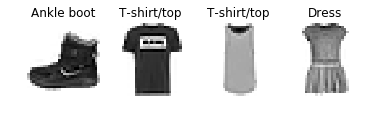

In [3]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

for cnt, image in enumerate(trainX[0:4]):
    plt.subplot(2, len(trainX[0:4]), cnt+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label_dict[trainY[cnt]])

## Przygotowanie danych do uczenia
Dane zaimportowane z datasetu to lista zdjęć. Każde zdjęcie ma 28px x 28px. Na wejście naszego modelu musimy podać listę wektorów 1D, a nie 2D jak to w przypadku zdjęć. Dokonujemy więc spłaszczenia. Spłaszczenie wektorów dotyczy się danych uczących i treningowych.

In [4]:
trainsetX = trainX.reshape(len(trainX), -1)
print(trainsetX.shape)
trainsetY = trainY
print(trainsetY.shape)

trainsetX = trainsetX[0:10000]
trainsetY = trainsetY[0:10000]

(60000, 784)
(60000,)


In [5]:
testsetX = testX.reshape(len(testX), -1)
print(testsetX.shape)
testsetY = testY
print(testsetY.shape)

(10000, 784)
(10000,)


## Klasyfikator
Definiujemy klasyfikator SVM.

In [6]:
classifier = svm.SVC(gamma=0.001)

## Uczenie
W tym kroku uczymy nasz model wag, które ma dostosować na podstawie danych wejściowych i wyjściowych.

In [7]:
classifier.fit(trainsetX, trainsetY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testowanie
Wybieramy pierwsze 10 zdjęć ze zbioru testowego i tworzymy dla nich predykcje

In [8]:
expected = testsetY[0:10]
predicted = classifier.predict(testsetX[0:10])

In [9]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           1       0.30      1.00      0.46         3
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

   micro avg       0.30      0.30      0.30        10
   macro avg       0.04      0.14      0.07        10
weighted avg       0.09      0.30      0.14        10


Confusion matrix:
[[3 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Zobrazowanie predykcji

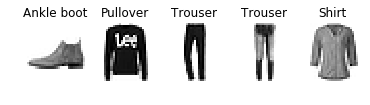

In [10]:
for cnt, item in enumerate(testX[0:5]):
    plt.subplot(2, 5, cnt + 1)
    plt.axis('off')
    plt.imshow(item, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label_dict[testsetY[cnt]])

## Dalsze testowanie
Tutaj można testować predykcje. Randomowo wybiera ID zdjęcia ze zbioru testowego i pokazuje do jakiej klasy dopasowano obrazek.

Text(0.5, 1.0, 'Trouser')

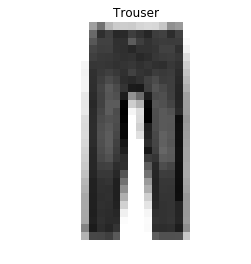

In [11]:
imid = random.randint(0, len(testsetX)-1)

pred = classifier.predict([testsetX[imid]])

plt.subplot(1,1,1)
plt.axis('off')
plt.imshow(testX[imid], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(label_dict[testsetY[imid]])